<a href="https://colab.research.google.com/github/Ratchadakorn26/Data-Warehouse-and-Big-Data-Analytics-66/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIDTERM

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

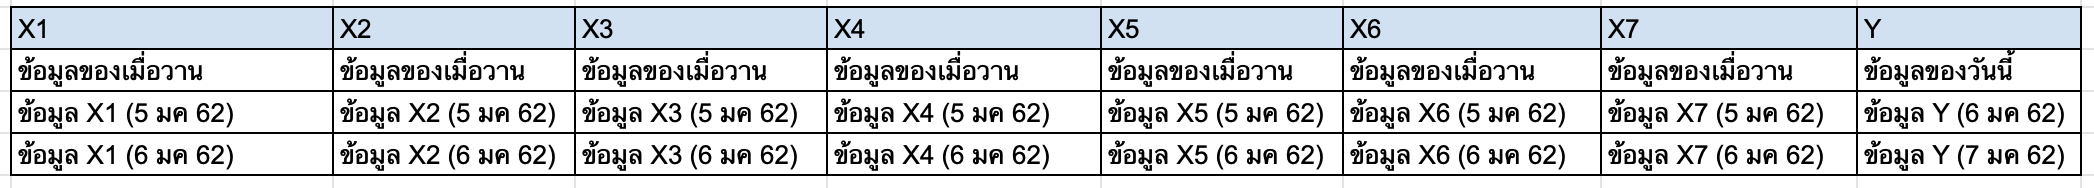

##เชื่อมgoogle drive

In [484]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [485]:
import pandas as pd

In [486]:
import numpy as np

In [487]:
import os

#นำเข้ามูลเข้า
ข้อมูลเป็นช่วงหน้าหนาว

##นำเข้าข้อมูลความกด(เปอร์เซ็น)ของทั้ง 5 จังหวัด


In [488]:
 Ap_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
 Ap_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
 Ap_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
 Ap_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
 Ap_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

In [489]:
 Ap_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [490]:
  Ap_kkn=Ap_kkn.replace('352201-หนองคาย จ.หนองคาย','381201-ขอนแก่น จ.ขอนแก่น')
  Ap_npm=Ap_npm.replace('352201-หนองคาย จ.หนองคาย','357201-นครพนม จ.นครพนม')
  Ap_snk= Ap_snk.replace('352201-หนองคาย จ.หนองคาย','356201-สกลนคร จ.สกลนคร')
  Ap_lei=Ap_lei.replace('352201-หนองคาย จ.หนองคาย','353301-เลย สกษ. จ.เลย')

##นำเข้าข้อมูลความชื้นสัมพัทธ์(เปอร์เซ็น)ของทั้ง 5 จังหวัด

In [491]:
Rh_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Rh_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Rh_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Rh_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Rh_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

In [492]:
Rh_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


##นำเข้าข้อมูลความเร็วลม(นอต)ของทั้ง 5 จังหวัด

In [493]:
Av_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Av_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Av_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Av_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Av_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

In [494]:
Av_kkn.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [495]:
Av_kkn=Av_kkn.replace('353301-เลย สกษ. จ.เลย','381201-ขอนแก่น จ.ขอนแก่น')
Av_npm=Av_npm.replace('353301-เลย สกษ. จ.เลย','357201-นครพนม จ.นครพนม')
Av_snk=Av_snk.replace('353301-เลย สกษ. จ.เลย','356201-สกลนคร จ.สกลนคร')
Av_nki=Av_nki.replace('353301-เลย สกษ. จ.เลย','352201-หนองคาย จ.หนองคาย')

##นำเข้าข้อมูลจำนวนเมฆ(10ส่วน)ของทั้ง 5 จังหวัด

In [496]:
Cl_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
Cl_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
Cl_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
Cl_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
Cl_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

In [497]:
Cl_kkn=Cl_kkn.replace('353301-เลย สกษ. จ.เลย','381201-ขอนแก่น จ.ขอนแก่น')
Cl_npm=Cl_npm.replace('353301-เลย สกษ. จ.เลย','357201-นครพนม จ.นครพนม')
Cl_snk=Cl_snk.replace('353301-เลย สกษ. จ.เลย','356201-สกลนคร จ.สกลนคร')
Cl_nki=Cl_nki.replace('353301-เลย สกษ. จ.เลย','352201-หนองคาย จ.หนองคาย')

ลบคอลัมที่เกินมาของจำนวนเมฆ(จ.เลย)

In [498]:
#พบว่าคอลัมจำนวนเมฆในจ.เลย มีคอลัมที่เกินมา
Cl_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [499]:
Cl_lei = Cl_lei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [500]:
Cl_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


##นำเข้าข้อมูลปริมาณฝน(มิลลิเมตร)ของทั้ง 5 จังหวัด

In [501]:
R_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
R_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
R_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
R_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
R_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

In [502]:
R_kkn

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


In [503]:
R_npm.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


##นำเข้าข้อมูลอุณหภูมิจุดน้ำค้าง(เซลเซียส)ของทั้ง 5 จังหวัด

In [504]:
Dew_tem_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dew_tem_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dew_tem_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dew_tem_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dew_tem_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [505]:
Dew_tem_kkn.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


##นำเข้าข้อมูลอุณหภูมิตุ้มแห้ง(เซลเซียส)ของทั้ง 5 จังหวัด

In [506]:
Dry_tem_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dry_tem_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dry_tem_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dry_tem_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dry_tem_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [507]:
Dry_tem_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


##นำเข้าข้อมูลอุณหภูมิต่ำสุด(เซลเซียส)ของทั้ง 5 จังหวัด

In [508]:
Mini_tem_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Mini_tem_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Mini_tem_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Mini_tem_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Mini_tem_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

In [509]:
Mini_tem_kkn.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


#เปลี่ยนชื่อคอลัม

In [510]:
rp={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'}

##ความกดอากาศ

In [511]:
Ap_kkn=Ap_kkn.rename(columns=rp)
Ap_npm=Ap_npm.rename(columns=rp)
Ap_snk=Ap_snk.rename(columns=rp)
Ap_nki=Ap_nki.rename(columns=rp)
Ap_lei=Ap_lei.rename(columns=rp)

In [512]:
Ap_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


##ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [513]:
Rh_kkn=Rh_kkn.rename(columns=rp)
Rh_npm=Rh_npm.rename(columns=rp)
Rh_snk=Rh_snk.rename(columns=rp)
Rh_nki=Rh_nki.rename(columns=rp)
Rh_lei=Rh_lei.rename(columns=rp)

In [514]:
Rh_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


##ความเร็วลม(นอต)

In [515]:
Av_kkn=Av_kkn.rename(columns=rp)
Av_npm=Av_npm.rename(columns=rp)
Av_snk=Av_snk.rename(columns=rp)
Av_nki=Av_nki.rename(columns=rp)
Av_lei=Av_lei.rename(columns=rp)

In [516]:
Av_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


##จำนวนเมฆ(10ส่วน)

In [517]:
Cl_kkn=Cl_kkn.rename(columns=rp)
Cl_npm=Cl_npm.rename(columns=rp)
Cl_snk=Cl_snk.rename(columns=rp)
Cl_nki=Cl_nki.rename(columns=rp)
Cl_lei=Cl_lei.rename(columns=rp)

In [518]:
Cl_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


##ปริมาณฝน(มิลลิเมตร)

In [519]:
R_kkn=R_kkn.rename(columns=rp)
R_npm=R_npm.rename(columns=rp)
R_snk=R_snk.rename(columns=rp)
R_nki=R_nki.rename(columns=rp)
R_lei=R_lei.rename(columns=rp)

In [520]:
R_kkn

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [521]:
Dew_tem_kkn=Dew_tem_kkn.rename(columns=rp)
Dew_tem_npm=Dew_tem_npm.rename(columns=rp)
Dew_tem_snk=Dew_tem_snk.rename(columns=rp)
Dew_tem_nki=Dew_tem_nki.rename(columns=rp)
Dew_tem_lei=Dew_tem_lei.rename(columns=rp)

In [522]:
Dew_tem_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


##อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [523]:
Dry_tem_kkn=Dry_tem_kkn.rename(columns=rp)
Dry_tem_npm=Dry_tem_npm.rename(columns=rp)
Dry_tem_snk=Dry_tem_snk.rename(columns=rp)
Dry_tem_nki=Dry_tem_nki.rename(columns=rp)
Dry_tem_lei=Dry_tem_lei.rename(columns=rp)

In [524]:
Dry_tem_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


##อุณหภูมิต่ำสุด(เซลเซียส)

In [525]:
Mini_tem_kkn=Mini_tem_kkn.rename(columns=rp)
Mini_tem_npm=Mini_tem_npm.rename(columns=rp)
Mini_tem_snk=Mini_tem_snk.rename(columns=rp)
Mini_tem_nki=Mini_tem_nki.rename(columns=rp)
Mini_tem_lei=Mini_tem_lei.rename(columns=rp)

In [526]:
Mini_tem_nki.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


#เช็คค่าMissing

##เปลี่ยน-ให้เป็นค่าNaN

###ความกดอากาศ
ส่วนมากค่า missing จะอยู่วันที่ 29,30,31 เพราะเดือนกุมภาพันธ์บางปีมี28วัน

In [527]:
Ap_kkn=Ap_kkn.replace('-',np.NaN)
Ap_npm=Ap_npm.replace('-',np.NaN)
Ap_snk=Ap_snk.replace('-',np.NaN)
Ap_nki=Ap_nki.replace('-',np.NaN)
Ap_lei=Ap_lei.replace('-',np.NaN)

In [528]:
Ap_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [529]:
Ap_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [530]:
Ap_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [531]:
Ap_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [532]:
Ap_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ความชื้นสัมพัทธ์(เปอร์เซ็น)
- ส่วนมากค่า missing จะอยู่วันที่ 29,30,31 เพราะเดือนกุมภาพันธ์บางปีมี28วัน
- ปริมาณฝนmissingมากเพราะข้อมูลที่มีเป็นช่วงหน้าหนาว


In [533]:
Rh_kkn=Rh_kkn.replace('-',np.NaN)
Rh_npm=Rh_npm.replace('-',np.NaN)
Rh_snk=Rh_snk.replace('-',np.NaN)
Rh_nki=Rh_nki.replace('-',np.NaN)
Rh_lei=Rh_lei.replace('-',np.NaN)

In [534]:
Rh_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [535]:
Rh_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [536]:
Rh_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [537]:
Rh_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [538]:
Rh_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ความเร็วลม(นอต)

In [539]:
Av_kkn=Av_kkn.replace('-',np.NaN)
Av_npm=Av_npm.replace('-',np.NaN)
Av_snk=Av_snk.replace('-',np.NaN)
Av_nki=Av_nki.replace('-',np.NaN)
Av_lei=Av_lei.replace('-',np.NaN)

In [540]:
Av_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [541]:
Av_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5              True
6             False
7              True
8              True
9             False
10             True
11             True
12             True
13            False
14            False
15             True
16             True
17            False
18             True
19            False
20             True
21             True
22             True
23            False
24             True
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [542]:
Av_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20             True
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [543]:
Av_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [544]:
Av_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16             True
17            False
18            False
19             True
20            False
21            False
22            False
23            False
24             True
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###จำนวนเมฆ(10ส่วน)

In [545]:
Cl_kkn=Cl_kkn.replace('-',np.NaN)
Cl_npm=Cl_npm.replace('-',np.NaN)
Cl_snk=Cl_snk.replace('-',np.NaN)
Cl_nki=Cl_nki.replace('-',np.NaN)
Cl_lei=Cl_lei.replace('-',np.NaN)

In [546]:
Cl_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [547]:
Cl_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11            False
12            False
13             True
14             True
15             True
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26            False
27             True
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [548]:
Cl_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [549]:
Cl_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [550]:
Cl_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ปริมาณฝน(มิลลิเมตร)

In [551]:
R_kkn=R_kkn.replace('-',np.NaN)
R_npm=R_npm.replace('-',np.NaN)
R_snk=R_snk.replace('-',np.NaN)
R_nki=R_nki.replace('-',np.NaN)
R_lei=R_lei.replace('-',np.NaN)

In [552]:
R_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [553]:
R_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [554]:
R_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [555]:
R_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [556]:
R_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

###อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [557]:
Dew_tem_kkn=Dew_tem_kkn.replace('-',np.NaN)
Dew_tem_npm=Dew_tem_npm.replace('-',np.NaN)
Dew_tem_snk=Dew_tem_snk.replace('-',np.NaN)
Dew_tem_nki=Dew_tem_nki.replace('-',np.NaN)
Dew_tem_lei=Dew_tem_lei.replace('-',np.NaN)

In [558]:
Dew_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [559]:
Dew_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [560]:
Dew_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [561]:
Dew_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [562]:
Dew_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [563]:
Dry_tem_kkn=Dry_tem_kkn.replace('-',np.NaN)
Dry_tem_npm=Dry_tem_npm.replace('-',np.NaN)
Dry_tem_snk=Dry_tem_snk.replace('-',np.NaN)
Dry_tem_nki=Dry_tem_nki.replace('-',np.NaN)
Dry_tem_lei=Dry_tem_lei.replace('-',np.NaN)

In [564]:
Dry_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [565]:
Dry_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [566]:
Dry_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [567]:
Dry_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [568]:
Dry_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิต่ำสุด(เซลเซียส)

In [569]:
Mini_tem_kkn=Mini_tem_kkn.replace('-',np.NaN)
Mini_tem_npm=Mini_tem_npm.replace('-',np.NaN)
Mini_tem_snk=Mini_tem_snk.replace('-',np.NaN)
Mini_tem_nki=Mini_tem_nki.replace('-',np.NaN)
Mini_tem_lei=Mini_tem_lei.replace('-',np.NaN)

In [570]:
Mini_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25            False
26            False
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [571]:
Mini_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11             True
12            False
13            False
14            False
15            False
16             True
17             True
18             True
19             True
20            False
21             True
22             True
23             True
24            False
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [572]:
Mini_tem_snk.isnull().any()

ที่            True
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [573]:
Mini_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [574]:
Mini_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12             True
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

##แก้ค่าmissing ด้วยค่าเฉลี่ยของแต่ละเดือน

###ความกดอากาศ

In [575]:
for Ap in range(len(Ap_kkn['ที่'])):
  Ap_kkn.iloc[Ap,:]=Ap_kkn.iloc[Ap,:].fillna(Ap_kkn.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_npm['ที่'])):
  Ap_npm.iloc[Ap,:]=Ap_npm.iloc[Ap,:].fillna(Ap_npm.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_snk['ที่'])):
  Ap_snk.iloc[Ap,:]=Ap_snk.iloc[Ap,:].fillna(Ap_snk.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_nki['ที่'])):
  Ap_nki.iloc[Ap,:]=Ap_nki.iloc[Ap,:].fillna(Ap_nki.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_lei['ที่'])):
  Ap_lei.iloc[Ap,:]=Ap_lei.iloc[Ap,:].fillna(Ap_lei.iloc[Ap]['ค่าเฉลี่ย'])

In [576]:
Ap_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [577]:
Ap_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [578]:
Ap_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [579]:
Ap_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [580]:
Ap_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###ความชื้นสัมพัทธ์(เปอร์เซ็น)





In [581]:
for Rh in range(len(Rh_kkn['ที่'])):
  Rh_kkn.iloc[Rh,:]=Rh_kkn.iloc[Rh,:].fillna(Rh_kkn.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_npm['ที่'])):
  Rh_npm.iloc[Rh,:]=Rh_npm.iloc[Rh,:].fillna(Rh_npm.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_snk['ที่'])):
  Rh_snk.iloc[Rh,:]=Rh_snk.iloc[Rh,:].fillna(Rh_snk.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_nki['ที่'])):
  Rh_nki.iloc[Rh,:]=Rh_nki.iloc[Rh,:].fillna(Rh_nki.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_lei['ที่'])):
  Rh_lei.iloc[Rh,:]=Rh_lei.iloc[Rh,:].fillna(Rh_lei.iloc[Rh]['ค่าเฉลี่ย'])

In [582]:
Rh_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [583]:
 Rh_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [584]:
 Rh_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [585]:
 Rh_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [586]:
 Rh_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###ความเร็วลม(นอต)

In [587]:
for Av in range(len(Av_kkn['ที่'])):
  Av_kkn.iloc[Av,:]=Av_kkn.iloc[Av,:].fillna(Av_kkn.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_npm['ที่'])):
  Av_npm.iloc[Av,:]=Av_npm.iloc[Av,:].fillna(Av_npm.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_snk['ที่'])):
  Av_snk.iloc[Av,:]=Av_snk.iloc[Av,:].fillna(Av_snk.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_nki['ที่'])):
  Av_nki.iloc[Av,:]=Av_nki.iloc[Av,:].fillna(Av_nki.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_lei['ที่'])):
  Av_lei.iloc[Av,:]=Av_lei.iloc[Av,:].fillna(Av_lei.iloc[Av]['ค่าเฉลี่ย'])

In [588]:
Av_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [589]:
Av_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [590]:
Av_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [591]:
Av_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [592]:
Av_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###จำนวนเมฆ(10ส่วน)

In [593]:
for Cl in range(len(Cl_kkn['ที่'])):
  Cl_kkn.iloc[Cl,:]=Cl_kkn.iloc[Cl,:].fillna(Cl_kkn.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_npm['ที่'])):
  Cl_npm.iloc[Cl,:]=Cl_npm.iloc[Cl,:].fillna(Cl_npm.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_snk['ที่'])):
  Cl_snk.iloc[Cl,:]=Cl_snk.iloc[Cl,:].fillna(Cl_snk.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_nki['ที่'])):
  Cl_nki.iloc[Cl,:]=Cl_nki.iloc[Cl,:].fillna(Cl_nki.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_lei['ที่'])):
  Cl_lei.iloc[Cl,:]=Cl_lei.iloc[Cl,:].fillna(Cl_lei.iloc[Cl]['ค่าเฉลี่ย'])

In [594]:
Cl_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [595]:
Cl_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [596]:
Cl_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [597]:
Cl_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [598]:
Cl_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###ปริมาณฝน(มิลลิเมตร)

In [599]:
for t in range(len(R_kkn['ที่'])):
  R_kkn.iloc[t,:]=R_kkn.iloc[t,:].fillna(R_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_npm['ที่'])):
  R_npm.iloc[t,:]=R_npm.iloc[t,:].fillna(R_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_snk['ที่'])):
  R_snk.iloc[t,:]=R_snk.iloc[t,:].fillna(R_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_nki['ที่'])):
  R_nki.iloc[t,:]=R_nki.iloc[t,:].fillna(R_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_lei['ที่'])):
  R_lei.iloc[t,:]=R_lei.iloc[t,:].fillna(R_lei.iloc[t]['ค่าเฉลี่ย'])

In [600]:
R_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [601]:
R_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14            False
15             True
16             True
17             True
18             True
19            False
20             True
21            False
22             True
23             True
24            False
25             True
26            False
27            False
28            False
29            False
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [602]:
R_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [603]:
R_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [604]:
R_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

เนื่องจากบางวันฝน/บางเดือนฝนไม่ตกจึงแทนค่า - ด้วย 0

In [605]:
#ปริมาณฝนขอนแก่น
R_kkn=R_kkn.replace('T',0.1)
R_kkn=R_kkn.replace('-',0)
R_kkn=R_kkn.fillna(0)
##ปริมาณฝนนครพนม
R_npm=R_npm.replace('T',0.1)
R_npm=R_npm.replace('-',0)
R_npm=R_npm.fillna(0)
#ปริมาณฝนสกลนคร
R_snk=R_snk.replace('T',0.1)
R_snk=R_snk.replace('-',0)
R_snk=R_snk.fillna(0)
#ปริมาณฝนหนองคาย
R_nki=R_nki.replace('T',0.1)
R_nki=R_nki.replace('-',0)
R_nki=R_nki.fillna(0)
#ปริมาณฝนเลย
R_lei=R_lei.replace('T',0.1)
R_lei=R_lei.replace('-',0)
R_lei=R_lei.fillna(0)

In [606]:
R_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [607]:
R_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [608]:
R_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [609]:
R_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [610]:
R_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [611]:
for t in range(len(Dew_tem_kkn['ที่'])):
  Dew_tem_kkn.iloc[t,:]=Dew_tem_kkn.iloc[t,:].fillna(Dew_tem_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_npm['ที่'])):
  Dew_tem_npm.iloc[t,:]=Dew_tem_npm.iloc[t,:].fillna(Dew_tem_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_snk['ที่'])):
  Dew_tem_snk.iloc[t,:]=Dew_tem_snk.iloc[t,:].fillna(Dew_tem_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_nki['ที่'])):
  Dew_tem_nki.iloc[t,:]=Dew_tem_nki.iloc[t,:].fillna(Dew_tem_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_lei['ที่'])):
  Dew_tem_lei.iloc[t,:]=Dew_tem_lei.iloc[t,:].fillna(Dew_tem_lei.iloc[t]['ค่าเฉลี่ย'])

In [612]:
 Dew_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [613]:
Dew_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [614]:
Dew_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [615]:
Dew_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [616]:
Dew_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [617]:
for t in range(len(Dry_tem_kkn['ที่'])):
  Dry_tem_kkn.iloc[t,:]=Dry_tem_kkn.iloc[t,:].fillna(Dry_tem_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_npm['ที่'])):
  Dry_tem_npm.iloc[t,:]=Dry_tem_npm.iloc[t,:].fillna(Dry_tem_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_snk['ที่'])):
  Dry_tem_snk.iloc[t,:]=Dry_tem_snk.iloc[t,:].fillna(Dry_tem_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_nki['ที่'])):
  Dry_tem_nki.iloc[t,:]=Dry_tem_nki.iloc[t,:].fillna(Dry_tem_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_lei['ที่'])):
  Dry_tem_lei.iloc[t,:]=Dry_tem_lei.iloc[t,:].fillna(Dry_tem_lei.iloc[t]['ค่าเฉลี่ย'])

In [618]:
 Dry_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [619]:
 Dry_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [620]:
 Dry_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [621]:
 Dry_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [622]:
 Dry_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิต่ำสุด(เซลเซียส)

In [623]:
for t in range(len(Mini_tem_kkn['ที่'])):
  Mini_tem_kkn.iloc[t,:]=Mini_tem_kkn.iloc[t,:].fillna(Mini_tem_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_npm['ที่'])):
  Mini_tem_npm.iloc[t,:]=Mini_tem_npm.iloc[t,:].fillna(Mini_tem_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_snk['ที่'])):
  Mini_tem_snk.iloc[t,:]=Mini_tem_snk.iloc[t,:].fillna(Mini_tem_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_nki['ที่'])):
  Mini_tem_nki.iloc[t,:]=Mini_tem_nki.iloc[t,:].fillna(Mini_tem_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_lei['ที่'])):
  Mini_tem_lei.iloc[t,:]=Mini_tem_lei.iloc[t,:].fillna(Mini_tem_lei.iloc[t]['ค่าเฉลี่ย'])

In [624]:
Mini_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [625]:
Mini_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [626]:
Mini_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [627]:
Mini_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [628]:
Mini_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

#จัดการข้อมูล
(เรียงคอลัมใหม่,เพิ่มคอลัมPrimary key,Dropคอลัมที่ไม่จำเป็น)

##ความกดอากาศ

In [629]:
#จังหวัดขอนแก่น
#เพิ่มคอลัม ปี เดือน จัง หวัด
Ap_kkn['Year'] = Ap_kkn['เดือนและปี'].dt.year
Ap_kkn['Month'] = Ap_kkn['เดือนและปี'].dt.month
Ap_kkn['จังหวัด']='ขอนเเก่น'
#dropคอลัมที่ไม่จำเป็น
Ap_kkn = Ap_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
#สลับวันที่จากคลอลัมน์ไปเป็นแถว
Ap_kkn = Ap_kkn.set_index(["Year",'Month','จังหวัด']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
#สร้างคอลัม Primary Key
Ap_kkn['id']=["KKN{}".format(i) for i in range(len(Ap_kkn['Month']))]

In [630]:
Ap_kkn

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,ขอนเเก่น,1,1005.470000,KKN0
1,2011,10,ขอนเเก่น,2,1006.650000,KKN1
2,2011,10,ขอนเเก่น,3,1007.490000,KKN2
3,2011,10,ขอนเเก่น,4,1008.280000,KKN3
4,2011,10,ขอนเเก่น,5,1009.880000,KKN4
...,...,...,...,...,...,...
1700,2022,2,ขอนเเก่น,27,1014.370000,KKN1700
1701,2022,2,ขอนเเก่น,28,1013.040000,KKN1701
1702,2022,2,ขอนเเก่น,29,1013.370000,KKN1702
1703,2022,2,ขอนเเก่น,30,1013.980000,KKN1703


In [631]:
#จังหวัดนครพนม
Ap_npm['Year'] = Ap_npm['เดือนและปี'].dt.year
Ap_npm['Month'] = Ap_npm['เดือนและปี'].dt.month
Ap_npm['จังหวัด']='นครพนม'
Ap_npm = Ap_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_npm = Ap_npm.set_index(["Year",'Month','จังหวัด']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
Ap_npm['id']=["NPM{}".format(i) for i in range(len(Ap_npm['Month']))]

In [632]:
Ap_npm

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,นครพนม,1,1006.300,NPM0
1,2011,10,นครพนม,2,1007.380,NPM1
2,2011,10,นครพนม,3,1008.070,NPM2
3,2011,10,นครพนม,4,1008.440,NPM3
4,2011,10,นครพนม,5,1010.510,NPM4
...,...,...,...,...,...,...
1700,2022,2,นครพนม,27,1016.430,NPM1700
1701,2022,2,นครพนม,28,1013.530,NPM1701
1702,2022,2,นครพนม,29,1013.370,NPM1702
1703,2022,2,นครพนม,30,1013.980,NPM1703


In [633]:
#จังหวัดสกลนคร
Ap_snk['Year'] = Ap_snk['เดือนและปี'].dt.year
Ap_snk['Month'] = Ap_snk['เดือนและปี'].dt.month
Ap_snk['จังหวัด']='สกลนคร'
Ap_snk = Ap_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_snk = Ap_snk.set_index(["Year",'Month','จังหวัด']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
Ap_snk['id']=["SNK{}".format(i) for i in range(len(Ap_snk['Month']))]

In [634]:
Ap_snk.head()

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,สกลนคร,1,1005.84,SNK0
1,2011,10,สกลนคร,2,1007.16,SNK1
2,2011,10,สกลนคร,3,1007.87,SNK2
3,2011,10,สกลนคร,4,1008.56,SNK3
4,2011,10,สกลนคร,5,1010.55,SNK4


In [635]:
#จังหวัดหนองคาย
Ap_nki['Year'] = Ap_nki['เดือนและปี'].dt.year
Ap_nki['Month'] = Ap_nki['เดือนและปี'].dt.month
Ap_nki['จังหวัด']='หนองคาย'
Ap_nki = Ap_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_nki = Ap_nki.set_index(["Year",'Month','จังหวัด']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
Ap_nki['id']=["NKI{}".format(i) for i in range(len(Ap_nki['Month']))]

In [636]:
Ap_nki.head()

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,หนองคาย,1,1005.34,NKI0
1,2011,10,หนองคาย,2,1006.67,NKI1
2,2011,10,หนองคาย,3,1007.39,NKI2
3,2011,10,หนองคาย,4,1008.11,NKI3
4,2011,10,หนองคาย,5,1009.69,NKI4


In [637]:
#จังหวัดเลย
Ap_lei['Year'] = Ap_lei['เดือนและปี'].dt.year
Ap_lei['Month'] = Ap_lei['เดือนและปี'].dt.month
Ap_lei['จังหวัด']='เลย'
Ap_lei = Ap_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_lei = Ap_lei.set_index(["Year",'Month','จังหวัด']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
Ap_lei['id']=["LEI{}".format(i) for i in range(len(Ap_lei['Month']))]

In [638]:
Ap_lei.head()

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,เลย,1,1005.12,LEI0
1,2011,10,เลย,2,1006.51,LEI1
2,2011,10,เลย,3,1007.81,LEI2
3,2011,10,เลย,4,1008.15,LEI3
4,2011,10,เลย,5,1009.21,LEI4


##ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [639]:
#จังหวัดขอนแก่น
Rh_kkn['Year'] = Rh_kkn['เดือนและปี'].dt.year
Rh_kkn['Month'] = Rh_kkn['เดือนและปี'].dt.month
Rh_kkn = Rh_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_kkn = Rh_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)','level_2':'Day'})
Rh_kkn['id']=["KKN{}".format(i) for i in range(len(Rh_kkn['Month']))]

In [640]:
Rh_kkn.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%),id
0,2011,10,1,83.0,KKN0
1,2011,10,2,92.0,KKN1
2,2011,10,3,86.0,KKN2
3,2011,10,4,80.0,KKN3
4,2011,10,5,86.0,KKN4


In [641]:
#จังหวัดนครพนม
Rh_npm['Year'] = Rh_npm['เดือนและปี'].dt.year
Rh_npm['Month'] = Rh_npm['เดือนและปี'].dt.month
Rh_npm = Rh_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_npm = Rh_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)','level_2':'Day'})
Rh_npm['id']=["NPM{}".format(i) for i in range(len(Rh_npm['Month']))]

In [642]:
Rh_npm.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%),id
0,2011,10,1,95.0,NPM0
1,2011,10,2,84.0,NPM1
2,2011,10,3,74.0,NPM2
3,2011,10,4,72.0,NPM3
4,2011,10,5,87.0,NPM4


In [643]:
#จังหวัดสกลนคร
Rh_snk['Year'] = Rh_snk['เดือนและปี'].dt.year
Rh_snk['Month'] = Rh_snk['เดือนและปี'].dt.month
Rh_snk = Rh_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_snk = Rh_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)','level_2':'Day'})
Rh_snk['id']=["SNK{}".format(i) for i in range(len(Rh_snk['Month']))]

In [644]:
Rh_snk.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%),id
0,2011,10,1,87.0,SNK0
1,2011,10,2,88.0,SNK1
2,2011,10,3,77.0,SNK2
3,2011,10,4,75.0,SNK3
4,2011,10,5,87.0,SNK4


In [645]:
#จังหวัดหนองคาย
Rh_nki['Year'] = Rh_nki['เดือนและปี'].dt.year
Rh_nki['Month'] = Rh_nki['เดือนและปี'].dt.month
Rh_nki = Rh_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_nki = Rh_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)','level_2':'Day'})
Rh_nki['id']=["NKI{}".format(i) for i in range(len(Rh_nki['Month']))]

In [646]:
Rh_nki.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%),id
0,2011,10,1,89.0,NKI0
1,2011,10,2,91.0,NKI1
2,2011,10,3,78.0,NKI2
3,2011,10,4,75.0,NKI3
4,2011,10,5,90.0,NKI4


In [647]:
#จังหวัดเลย
Rh_lei['Year'] = Rh_lei['เดือนและปี'].dt.year
Rh_lei['Month'] = Rh_lei['เดือนและปี'].dt.month
Rh_lei = Rh_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_lei = Rh_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)','level_2':'Day'})
Rh_lei['id']=["LEI{}".format(i) for i in range(len(Rh_lei['Month']))]

In [648]:
Rh_lei.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%),id
0,2011,10,1,90.0,LEI0
1,2011,10,2,95.0,LEI1
2,2011,10,3,92.0,LEI2
3,2011,10,4,89.0,LEI3
4,2011,10,5,86.0,LEI4


##ความเร็วลม(นอต)

In [649]:
#จังหวัดขอนแก่น
Av_kkn['Year'] = Av_kkn['เดือนและปี'].dt.year
Av_kkn['Month'] = Av_kkn['เดือนและปี'].dt.month
Av_kkn = Av_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_kkn = Av_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Av_kkn['id']=["KKN{}".format(i) for i in range(len(Av_kkn['Month']))]

In [650]:
Av_kkn.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,3.0,KKN0
1,2011,10,2,2.0,KKN1
2,2011,10,3,3.0,KKN2
3,2011,10,4,2.0,KKN3
4,2011,10,5,2.0,KKN4


In [651]:
#จังหวัดนครพนม
Av_npm['Year'] = Av_npm['เดือนและปี'].dt.year
Av_npm['Month'] = Av_npm['เดือนและปี'].dt.month
Av_npm = Av_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_npm = Av_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Av_npm['id']=["NPM{}".format(i) for i in range(len(Av_npm['Month']))]

In [652]:
Av_npm.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,1.0,NPM0
1,2011,10,2,1.0,NPM1
2,2011,10,3,2.0,NPM2
3,2011,10,4,2.0,NPM3
4,2011,10,5,1.0,NPM4


In [653]:
#จังหวัดสกลนคร
Av_snk['Year'] = Av_snk['เดือนและปี'].dt.year
Av_snk['Month'] = Av_snk['เดือนและปี'].dt.month
Av_snk = Av_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_snk = Av_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Av_snk['id']=["SNK{}".format(i) for i in range(len(Av_snk['Month']))]

In [654]:
Av_snk.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,1.0,SNK0
1,2011,10,2,1.0,SNK1
2,2011,10,3,2.0,SNK2
3,2011,10,4,2.0,SNK3
4,2011,10,5,1.0,SNK4


In [655]:
#จังหวัดหนองคาย
Av_nki['Year'] = Av_nki['เดือนและปี'].dt.year
Av_nki['Month'] = Av_nki['เดือนและปี'].dt.month
Av_nki = Av_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_nki = Av_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Av_nki['id']=["NKI{}".format(i) for i in range(len(Av_nki['Month']))]

In [656]:
Av_nki.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,1.0,NKI0
1,2011,10,2,4.0,NKI1
2,2011,10,3,4.0,NKI2
3,2011,10,4,2.0,NKI3
4,2011,10,5,1.0,NKI4


In [657]:
#จังหวัดเลย
Av_lei['Year'] = Av_lei['เดือนและปี'].dt.year
Av_lei['Month'] = Av_lei['เดือนและปี'].dt.month
Av_lei = Av_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_lei = Av_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_2':'Day'})
Av_lei['id']=["LEI{}".format(i) for i in range(len(Av_lei['Month']))]

In [658]:
Av_lei.head()

,Year,Month,Day,ความเร็วลม(นอต),id
0,2011,10,1,2.0,LEI0
1,2011,10,2,2.0,LEI1
2,2011,10,3,3.0,LEI2
3,2011,10,4,2.0,LEI3
4,2011,10,5,3.0,LEI4


##จำนวนเมฆ(10ส่วน)

In [659]:
#จังหวัดขอนแก่น
Cl_kkn['Year'] = Cl_kkn['เดือนและปี'].dt.year
Cl_kkn['Month'] = Cl_kkn['เดือนและปี'].dt.month
Cl_kkn = Cl_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_kkn = Cl_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cl_kkn['id']=["KKN{}".format(i) for i in range(len(Cl_kkn['Month']))]

In [660]:
Cl_kkn.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,9.0,KKN0
1,2011,10,2,10.0,KKN1
2,2011,10,3,10.0,KKN2
3,2011,10,4,8.0,KKN3
4,2011,10,5,10.0,KKN4


In [661]:
#จังหวัดนครพนม
Cl_npm['Year'] = Cl_npm['เดือนและปี'].dt.year
Cl_npm['Month'] = Cl_npm['เดือนและปี'].dt.month
Cl_npm = Cl_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_npm = Cl_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cl_npm['id']=["NPM{}".format(i) for i in range(len(Cl_npm['Month']))]

In [662]:
Cl_npm.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,10.0,NPM0
1,2011,10,2,7.0,NPM1
2,2011,10,3,8.0,NPM2
3,2011,10,4,8.0,NPM3
4,2011,10,5,10.0,NPM4


In [663]:
#จังหวัดสกลนคร
Cl_snk['Year'] = Cl_snk['เดือนและปี'].dt.year
Cl_snk['Month'] = Cl_snk['เดือนและปี'].dt.month
Cl_snk = Cl_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_snk = Cl_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cl_snk['id']=["SNK{}".format(i) for i in range(len(Cl_snk['Month']))]

In [664]:
Cl_snk.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,9.0,SNK0
1,2011,10,2,9.0,SNK1
2,2011,10,3,7.0,SNK2
3,2011,10,4,7.0,SNK3
4,2011,10,5,9.0,SNK4


In [665]:
#จังหวัดหนองคาย
Cl_nki['Year'] = Cl_nki['เดือนและปี'].dt.year
Cl_nki['Month'] = Cl_nki['เดือนและปี'].dt.month
Cl_nki = Cl_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_nki = Cl_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cl_nki['id']=["NKI{}".format(i) for i in range(len(Cl_nki['Month']))]

In [666]:
Cl_nki.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,10.0,NKI0
1,2011,10,2,10.0,NKI1
2,2011,10,3,8.0,NKI2
3,2011,10,4,9.0,NKI3
4,2011,10,5,9.0,NKI4


In [667]:
#จังหวัดเลย
Cl_lei['Year'] = Cl_lei['เดือนและปี'].dt.year
Cl_lei['Month'] = Cl_lei['เดือนและปี'].dt.month
Cl_lei = Cl_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_lei = Cl_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_2':'Day'})
Cl_lei['id']=["LEI{}".format(i) for i in range(len(Cl_lei['Month']))]

In [668]:
Cl_lei.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน),id
0,2011,10,1,8.0,LEI0
1,2011,10,2,10.0,LEI1
2,2011,10,3,10.0,LEI2
3,2011,10,4,9.0,LEI3
4,2011,10,5,8.0,LEI4


##ปริมาณฝน(มิลลิเมตร)

In [669]:
#จังหวัดขอนแก่น
R_kkn['Year'] = R_kkn['เดือนและปี'].dt.year
R_kkn['Month'] = R_kkn['เดือนและปี'].dt.month
R_kkn = R_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_kkn = R_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_2':'Day'})
R_kkn['id']=["KKN{}".format(i) for i in range(len(R_kkn['Month']))]

In [670]:
R_kkn.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร),id
0,2011,10,1,1.4,KKN0
1,2011,10,2,17.7,KKN1
2,2011,10,3,3.0,KKN2
3,2011,10,4,0.0,KKN3
4,2011,10,5,2.2,KKN4


In [671]:
#จังหวัดนครพนม
R_npm['Year'] = R_npm['เดือนและปี'].dt.year
R_npm['Month'] = R_npm['เดือนและปี'].dt.month
R_npm = R_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_npm = R_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_2':'Day'})
R_npm['id']=["NPM{}".format(i) for i in range(len(R_npm['Month']))]

In [672]:
R_npm.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร),id
0,2011,10,1,17.0,NPM0
1,2011,10,2,0.3,NPM1
2,2011,10,3,0.0,NPM2
3,2011,10,4,0.3,NPM3
4,2011,10,5,1.9,NPM4


In [673]:
#จังหวัดสกลนคร
R_snk['Year'] = R_snk['เดือนและปี'].dt.year
R_snk['Month'] = R_snk['เดือนและปี'].dt.month
R_snk = R_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_snk = R_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_2':'Day'})
R_snk['id']=["SNK{}".format(i) for i in range(len(R_snk['Month']))]

In [674]:
R_snk.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร),id
0,2011,10,1,84.8,SNK0
1,2011,10,2,28.1,SNK1
2,2011,10,3,0.0,SNK2
3,2011,10,4,0.1,SNK3
4,2011,10,5,5.5,SNK4


In [675]:
#จังหวัดหนองคาย
R_nki['Year'] = R_nki['เดือนและปี'].dt.year
R_nki['Month'] = R_nki['เดือนและปี'].dt.month
R_nki = R_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_nki = R_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_2':'Day'})
R_nki['id']=["NKI{}".format(i) for i in range(len(R_nki['Month']))]

In [676]:
R_nki.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร),id
0,2011,10,1,48.6,NKI0
1,2011,10,2,59.0,NKI1
2,2011,10,3,0.0,NKI2
3,2011,10,4,1.0,NKI3
4,2011,10,5,19.1,NKI4


In [677]:
#จังหวัดเลย
R_lei['Year'] = R_lei['เดือนและปี'].dt.year
R_lei['Month'] = R_lei['เดือนและปี'].dt.month
R_lei = R_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_lei = R_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_2':'Day'})
R_lei['id']=["LEI{}".format(i) for i in range(len(R_lei['Month']))]

In [678]:
R_lei.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร),id
0,2011,10,1,21.6,LEI0
1,2011,10,2,111.4,LEI1
2,2011,10,3,0.4,LEI2
3,2011,10,4,0.0,LEI3
4,2011,10,5,0.0,LEI4


##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [679]:
#จังหวัดขอนแก่น
Dew_tem_kkn['Year'] = Dew_tem_kkn['เดือนและปี'].dt.year
Dew_tem_kkn['Month'] = Dew_tem_kkn['เดือนและปี'].dt.month
Dew_tem_kkn = Dew_tem_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_kkn = Dew_tem_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
Dew_tem_kkn['id']=["KKN{}".format(i) for i in range(len(Dew_tem_kkn['Month']))]

In [680]:
Dew_tem_kkn.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,24.2,KKN0
1,2011,10,2,24.0,KKN1
2,2011,10,3,22.9,KKN2
3,2011,10,4,21.9,KKN3
4,2011,10,5,21.7,KKN4


In [681]:
#จังหวัดนครพนม
Dew_tem_npm['Year'] = Dew_tem_npm['เดือนและปี'].dt.year
Dew_tem_npm['Month'] = Dew_tem_npm['เดือนและปี'].dt.month
Dew_tem_npm = Dew_tem_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_npm = Dew_tem_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
Dew_tem_npm['id']=["NPM{}".format(i) for i in range(len(Dew_tem_npm['Month']))]

In [682]:
Dew_tem_npm.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,25.1,NPM0
1,2011,10,2,23.1,NPM1
2,2011,10,3,20.1,NPM2
3,2011,10,4,18.9,NPM3
4,2011,10,5,20.7,NPM4


In [683]:
#จังหวัดสกลนคร
Dew_tem_snk['Year'] = Dew_tem_snk['เดือนและปี'].dt.year
Dew_tem_snk['Month'] = Dew_tem_snk['เดือนและปี'].dt.month
Dew_tem_snk = Dew_tem_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_snk = Dew_tem_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
Dew_tem_snk['id']=["SNK{}".format(i) for i in range(len(Dew_tem_snk['Month']))]

In [684]:
Dew_tem_snk.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,24.5,SNK0
1,2011,10,2,23.6,SNK1
2,2011,10,3,21.1,SNK2
3,2011,10,4,20.0,SNK3
4,2011,10,5,21.2,SNK4


In [685]:
#จังหวัดหนองคาย
Dew_tem_nki['Year'] = Dew_tem_nki['เดือนและปี'].dt.year
Dew_tem_nki['Month'] = Dew_tem_nki['เดือนและปี'].dt.month
Dew_tem_nki = Dew_tem_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_nki = Dew_tem_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
Dew_tem_nki['id']=["NKI{}".format(i) for i in range(len(Dew_tem_nki['Month']))]

In [686]:
Dew_tem_nki.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,24.6,NKI0
1,2011,10,2,23.8,NKI1
2,2011,10,3,22.4,NKI2
3,2011,10,4,21.9,NKI3
4,2011,10,5,23.3,NKI4


In [687]:
#จังหวัดเลย
Dew_tem_lei['Year'] = Dew_tem_lei['เดือนและปี'].dt.year
Dew_tem_lei['Month'] = Dew_tem_lei['เดือนและปี'].dt.month
Dew_tem_lei = Dew_tem_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_lei = Dew_tem_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_2':'Day'})
Dew_tem_lei['id']=["LEI{}".format(i) for i in range(len(Dew_tem_lei['Month']))]

In [688]:
Dew_tem_lei.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส),id
0,2011,10,1,23.6,LEI0
1,2011,10,2,23.5,LEI1
2,2011,10,3,21.9,LEI2
3,2011,10,4,21.9,LEI3
4,2011,10,5,21.8,LEI4


##อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [689]:
#จังหวัดขอนแก่น
Dry_tem_kkn['Year'] = Dry_tem_kkn['เดือนและปี'].dt.year
Dry_tem_kkn['Month'] = Dry_tem_kkn['เดือนและปี'].dt.month
Dry_tem_kkn = Dry_tem_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_kkn = Dry_tem_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Dry_tem_kkn['id']=["KKN{}".format(i) for i in range(len(Dry_tem_kkn['Month']))]

In [690]:
Dry_tem_kkn.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,27.6,KKN0
1,2011,10,2,25.6,KKN1
2,2011,10,3,25.6,KKN2
3,2011,10,4,25.8,KKN3
4,2011,10,5,24.3,KKN4


In [691]:
#จังหวัดนครพนม
Dry_tem_npm['Year'] = Dry_tem_npm['เดือนและปี'].dt.year
Dry_tem_npm['Month'] = Dry_tem_npm['เดือนและปี'].dt.month
Dry_tem_npm = Dry_tem_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_npm = Dry_tem_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Dry_tem_npm['id']=["NPM{}".format(i) for i in range(len(Dry_tem_npm['Month']))]

In [692]:
Dry_tem_npm.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,25.9,NPM0
1,2011,10,2,26.1,NPM1
2,2011,10,3,25.3,NPM2
3,2011,10,4,24.7,NPM3
4,2011,10,5,23.1,NPM4


In [693]:
#จังหวัดสกลนคร
Dry_tem_snk['Year'] = Dry_tem_snk['เดือนและปี'].dt.year
Dry_tem_snk['Month'] = Dry_tem_snk['เดือนและปี'].dt.month
Dry_tem_snk = Dry_tem_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_snk = Dry_tem_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Dry_tem_snk['id']=["SNK{}".format(i) for i in range(len(Dry_tem_snk['Month']))]

In [694]:
Dry_tem_snk.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,26.9,SNK0
1,2011,10,2,25.9,SNK1
2,2011,10,3,25.7,SNK2
3,2011,10,4,25.2,SNK3
4,2011,10,5,23.6,SNK4


In [695]:
#จังหวัดหนองคาย
Dry_tem_nki['Year'] = Dry_tem_nki['เดือนและปี'].dt.year
Dry_tem_nki['Month'] = Dry_tem_nki['เดือนและปี'].dt.month
Dry_tem_nki = Dry_tem_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_nki = Dry_tem_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Dry_tem_nki['id']=["NKI{}".format(i) for i in range(len(Dry_tem_nki['Month']))]

In [696]:
Dry_tem_nki.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,26.7,NKI0
1,2011,10,2,25.5,NKI1
2,2011,10,3,27.0,NKI2
3,2011,10,4,26.8,NKI3
4,2011,10,5,24.9,NKI4


In [697]:
#จังหวัดเลย
Dry_tem_lei['Year'] = Dry_tem_lei['เดือนและปี'].dt.year
Dry_tem_lei['Month'] = Dry_tem_lei['เดือนและปี'].dt.month
Dry_tem_lei = Dry_tem_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_lei = Dry_tem_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_2':'Day'})
Dry_tem_lei['id']=["LEI{}".format(i) for i in range(len(Dry_tem_lei['Month']))]

In [698]:
Dry_tem_lei.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส),id
0,2011,10,1,26.3,LEI0
1,2011,10,2,25.1,LEI1
2,2011,10,3,24.4,LEI2
3,2011,10,4,25.2,LEI3
4,2011,10,5,25.6,LEI4


##อุณหภูมิต่ำสุด(เซลเซียส)

In [699]:
#จังหวัดขอนแก่น
Mini_tem_kkn['Year'] = Mini_tem_kkn['เดือนและปี'].dt.year
Mini_tem_kkn['Month'] = Mini_tem_kkn['เดือนและปี'].dt.month
Mini_tem_kkn = Mini_tem_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_kkn = Mini_tem_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Mini_tem_kkn['id']=["KKN{}".format(i) for i in range(len(Mini_tem_kkn['Month']))]

In [700]:
Mini_tem_kkn.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,24.8,KKN0
1,2011,10,2,23.0,KKN1
2,2011,10,3,22.1,KKN2
3,2011,10,4,22.8,KKN3
4,2011,10,5,23.1,KKN4


In [701]:
#จังหวัดนครพนม
Mini_tem_npm['Year'] = Mini_tem_npm['เดือนและปี'].dt.year
Mini_tem_npm['Month'] = Mini_tem_npm['เดือนและปี'].dt.month
Mini_tem_npm = Mini_tem_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_npm = Mini_tem_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Mini_tem_npm['id']=["NPM{}".format(i) for i in range(len(Mini_tem_npm['Month']))]

In [702]:
Mini_tem_npm.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,25.0,NPM0
1,2011,10,2,23.4,NPM1
2,2011,10,3,22.2,NPM2
3,2011,10,4,20.6,NPM3
4,2011,10,5,21.1,NPM4


In [703]:
#จังหวัดสกลนคร
Mini_tem_snk['Year'] = Mini_tem_snk['เดือนและปี'].dt.year
Mini_tem_snk['Month'] = Mini_tem_snk['เดือนและปี'].dt.month
Mini_tem_snk = Mini_tem_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_snk = Mini_tem_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Mini_tem_snk['id']=["SNK{}".format(i) for i in range(len(Mini_tem_snk['Month']))]

In [704]:
Mini_tem_snk.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,24.5,SNK0
1,2011,10,2,23.1,SNK1
2,2011,10,3,22.6,SNK2
3,2011,10,4,21.8,SNK3
4,2011,10,5,22.5,SNK4


In [705]:
#จังหวัดหนองคาย
Mini_tem_nki['Year'] = Mini_tem_nki['เดือนและปี'].dt.year
Mini_tem_nki['Month'] = Mini_tem_nki['เดือนและปี'].dt.month
Mini_tem_nki = Mini_tem_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_nki = Mini_tem_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Mini_tem_nki['id']=["NKI{}".format(i) for i in range(len(Mini_tem_nki['Month']))]

In [706]:
Mini_tem_nki.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,25.3,NKI0
1,2011,10,2,23.3,NKI1
2,2011,10,3,23.6,NKI2
3,2011,10,4,23.8,NKI3
4,2011,10,5,23.3,NKI4


In [707]:
#จังหวัดเลย
Mini_tem_lei['Year'] = Mini_tem_lei['เดือนและปี'].dt.year
Mini_tem_lei['Month'] = Mini_tem_lei['เดือนและปี'].dt.month
Mini_tem_lei = Mini_tem_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_lei = Mini_tem_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_2':'Day'})
Mini_tem_lei['id']=["LEI{}".format(i) for i in range(len(Mini_tem_lei['Month']))]

In [708]:
Mini_tem_lei.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส),id
0,2011,10,1,23.5,LEI0
1,2011,10,2,24.3,LEI1
2,2011,10,3,22.5,LEI2
3,2011,10,4,23.0,LEI3
4,2011,10,5,22.7,LEI4


#รวมตาราง

##เลือกแค่ค่าที่ต้องการ (Xi,id)เพื่อเอาไป เชื่อมตาราง
เมื่อ Xแทนสภาพต่างๆ
iแทนจังหวัด
 - ไม่เปลี่ยนของความกดอากาศเพราะจะเอาเป็นตารางต้น

###ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [709]:
Rh_kkn=Rh_kkn[['id','ความชื่นสัมพัทธ์(%)']]
Rh_npm=Rh_npm[['id','ความชื่นสัมพัทธ์(%)']]
Rh_snk=Rh_snk[['id','ความชื่นสัมพัทธ์(%)']]
Rh_nki=Rh_nki[['id','ความชื่นสัมพัทธ์(%)']]
Rh_lei=Rh_lei[['id','ความชื่นสัมพัทธ์(%)']]

###ความเร็วลม(นอต)

In [710]:
Av_kkn=Av_kkn[['id','ความเร็วลม(นอต)']]
Av_npm=Av_npm[['id','ความเร็วลม(นอต)']]
Av_snk=Av_snk[['id','ความเร็วลม(นอต)']]
Av_nki=Av_nki[['id','ความเร็วลม(นอต)']]
Av_lei=Av_lei[['id','ความเร็วลม(นอต)']]

###จำนวนเมฆ(10ส่วน)

In [711]:
Cl_kkn=Cl_kkn[['id','จำนวนเมฆ(10ส่วน)']]
Cl_npm=Cl_npm[['id','จำนวนเมฆ(10ส่วน)']]
Cl_snk=Cl_snk[['id','จำนวนเมฆ(10ส่วน)']]
Cl_nki=Cl_nki[['id','จำนวนเมฆ(10ส่วน)']]
Cl_lei=Cl_lei[['id','จำนวนเมฆ(10ส่วน)']]

###ปริมาณฝน(มิลลิเมตร)

In [712]:
R_kkn=R_kkn[['id','ปริมาณฝน(มิลลิเมตร)']]
R_npm=R_npm[['id','ปริมาณฝน(มิลลิเมตร)']]
R_snk=R_snk[['id','ปริมาณฝน(มิลลิเมตร)']]
R_nki=R_nki[['id','ปริมาณฝน(มิลลิเมตร)']]
R_lei=R_lei[['id','ปริมาณฝน(มิลลิเมตร)']]

###อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [713]:
Dew_tem_kkn=Dew_tem_kkn[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_tem_npm=Dew_tem_npm[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_tem_snk=Dew_tem_snk[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_tem_nki=Dew_tem_nki[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_tem_lei=Dew_tem_lei[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]

###อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [714]:
Dry_tem_kkn=Dry_tem_kkn[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
Dry_tem_npm=Dry_tem_npm[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
Dry_tem_snk=Dry_tem_snk[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
Dry_tem_nki=Dry_tem_nki[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
Dry_tem_lei=Dry_tem_lei[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

###อุณหภูมิต่ำสุด(เซลเซียส)

In [715]:
Mini_tem_kkn=Mini_tem_kkn[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
Mini_tem_npm=Mini_tem_npm[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
Mini_tem_snk=Mini_tem_snk[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
Mini_tem_nki=Mini_tem_nki[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]
Mini_tem_lei=Mini_tem_lei[['id','อุณหภูมิต่ำสุด(เซลเซียส)']]

##Mergeตารางแต่ละลักษณะอากาศด้วยจังหวัด

###จังหวัดขอนแก่น

In [716]:
join_kkn=pd.merge(Ap_kkn,Rh_kkn,on='id')
joinkkn1=pd.merge(join_kkn,Av_kkn,on='id')
joinkkn2=pd.merge(joinkkn1,Cl_kkn,on='id')
joinkkn3=pd.merge(joinkkn2,Mini_tem_kkn,on='id')
joinkkn4=pd.merge(joinkkn3,Dew_tem_kkn,on='id')
joinkkn5=pd.merge(joinkkn4,Dry_tem_kkn,on='id')
joinkkn6=pd.merge(joinkkn5,R_kkn,on='id')

In [717]:
joinkkn6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,2011,10,ขอนเเก่น,1,1005.470000,KKN0,83.0,3.000000,9.000000,24.8,24.200000,27.6,1.4
1,2011,10,ขอนเเก่น,2,1006.650000,KKN1,92.0,2.000000,10.000000,23.0,24.000000,25.6,17.7
2,2011,10,ขอนเเก่น,3,1007.490000,KKN2,86.0,3.000000,10.000000,22.1,22.900000,25.6,3.0
3,2011,10,ขอนเเก่น,4,1008.280000,KKN3,80.0,2.000000,8.000000,22.8,21.900000,25.8,0.0
4,2011,10,ขอนเเก่น,5,1009.880000,KKN4,86.0,2.000000,10.000000,23.1,21.700000,24.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,ขอนเเก่น,27,1014.370000,KKN1700,58.0,2.000000,2.000000,18.2,15.700000,25.1,0.0
1701,2022,2,ขอนเเก่น,28,1013.040000,KKN1701,62.0,2.000000,2.000000,20.2,17.500000,25.9,45.2
1702,2022,2,ขอนเเก่น,29,1013.370000,KKN1702,69.0,2.571429,2.571429,20.2,17.978571,24.6,45.2
1703,2022,2,ขอนเเก่น,30,1013.980000,KKN1703,69.0,2.571429,2.571429,20.2,17.978571,24.6,45.2


###จังหวัดนครพนม

In [718]:
joinnpm=pd.merge(Ap_npm,Rh_npm,on='id')
joinnpm1=pd.merge(joinnpm,Av_npm,on='id')
joinnpmn2=pd.merge(joinnpm1,Cl_npm,on='id')
joinnpm3=pd.merge(joinnpmn2,Mini_tem_npm,on='id')
joinnpm4=pd.merge(joinnpm3,Dew_tem_npm,on='id')
joinnpm5=pd.merge(joinnpm4,Dry_tem_npm,on='id')
joinnpm6=pd.merge(joinnpm5,R_npm,on='id')

In [719]:
joinnpm6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,2011,10,นครพนม,1,1006.300,NPM0,95.0,1.000000,10.000000,25.0,25.100,25.9,17.0
1,2011,10,นครพนม,2,1007.380,NPM1,84.0,1.000000,7.000000,23.4,23.100,26.1,0.3
2,2011,10,นครพนม,3,1008.070,NPM2,74.0,2.000000,8.000000,22.2,20.100,25.3,0.0
3,2011,10,นครพนม,4,1008.440,NPM3,72.0,2.000000,8.000000,20.6,18.900,24.7,0.3
4,2011,10,นครพนม,5,1010.510,NPM4,87.0,1.000000,10.000000,21.1,20.700,23.1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,นครพนม,27,1016.430,NPM1700,52.0,2.000000,1.000000,18.1,13.200,24.1,0.0
1701,2022,2,นครพนม,28,1013.530,NPM1701,60.0,1.000000,0.000000,16.0,14.900,24.0,0.0
1702,2022,2,นครพนม,29,1013.370,NPM1702,64.0,2.142857,4.518519,18.3,15.575,23.2,21.7
1703,2022,2,นครพนม,30,1013.980,NPM1703,64.0,2.142857,4.518519,18.3,15.575,23.2,21.7


###จังหวัดสกลนคร

In [720]:
joinsnk=pd.merge(Ap_snk,Rh_snk,on='id')
joinsnk1=pd.merge(joinsnk,Av_snk,on='id')
joinsnk2=pd.merge(joinsnk1,Cl_snk,on='id')
joinsnk3=pd.merge(joinsnk2,Mini_tem_snk,on='id')
joinsnk4=pd.merge(joinsnk3,Dew_tem_snk,on='id')
joinsnk5=pd.merge(joinsnk4,Dry_tem_snk,on='id')
joinsnk6=pd.merge(joinsnk5,R_snk,on='id')

In [721]:
joinsnk6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,2011,10,สกลนคร,1,1005.840000,SNK0,87.0,1.000000,9.000000,24.5,24.500000,26.9,84.8
1,2011,10,สกลนคร,2,1007.160000,SNK1,88.0,1.000000,9.000000,23.1,23.600000,25.9,28.1
2,2011,10,สกลนคร,3,1007.870000,SNK2,77.0,2.000000,7.000000,22.6,21.100000,25.7,0.0
3,2011,10,สกลนคร,4,1008.560000,SNK3,75.0,2.000000,7.000000,21.8,20.000000,25.2,0.1
4,2011,10,สกลนคร,5,1010.550000,SNK4,87.0,1.000000,9.000000,22.5,21.200000,23.6,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,สกลนคร,27,1014.950000,SNK1700,65.0,3.000000,3.000000,16.1,15.700000,23.2,0.0
1701,2022,2,สกลนคร,28,1012.890000,SNK1701,68.0,2.000000,0.000000,17.0,17.300000,24.4,38.8
1702,2022,2,สกลนคร,29,1013.370000,SNK1702,73.0,3.035714,1.000000,17.0,17.428571,22.8,38.8
1703,2022,2,สกลนคร,30,1013.980000,SNK1703,73.0,3.035714,1.000000,17.0,17.428571,22.8,38.8


###จังหวัดหนองคาย

In [722]:
joinnki=pd.merge(Ap_nki,Rh_nki,on='id')
joinnki1=pd.merge(joinnki,Av_nki,on='id')
joinnki2=pd.merge(joinnki1,Cl_nki,on='id')
joinnki3=pd.merge(joinnki2,Mini_tem_nki,on='id')
joinnki4=pd.merge(joinnki3,Dew_tem_nki,on='id')
joinnki5=pd.merge(joinnki4,Dry_tem_nki,on='id')
joinnki6=pd.merge(joinnki5,R_nki,on='id')

In [723]:
joinnki6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,2011,10,หนองคาย,1,1005.340000,NKI0,89.0,1.000000,10.000000,25.3,24.600000,26.7,48.6
1,2011,10,หนองคาย,2,1006.670000,NKI1,91.0,4.000000,10.000000,23.3,23.800000,25.5,59.0
2,2011,10,หนองคาย,3,1007.390000,NKI2,78.0,4.000000,8.000000,23.6,22.400000,27.0,0.0
3,2011,10,หนองคาย,4,1008.110000,NKI3,75.0,2.000000,9.000000,23.8,21.900000,26.8,1.0
4,2011,10,หนองคาย,5,1009.690000,NKI4,90.0,1.000000,9.000000,23.3,23.300000,24.9,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,หนองคาย,27,1015.310000,NKI1700,62.0,2.000000,3.000000,17.5,15.800000,23.8,0.0
1701,2022,2,หนองคาย,28,1013.060000,NKI1701,65.0,2.000000,2.000000,19.0,17.800000,25.4,0.0
1702,2022,2,หนองคาย,29,1012.519286,NKI1702,71.0,2.392857,1.000000,19.0,16.600000,23.7,148.4
1703,2022,2,หนองคาย,30,1012.519286,NKI1703,71.0,2.392857,1.000000,19.0,14.900000,23.7,148.4


###จังหวัดเลย

In [724]:
joinlei=pd.merge(Ap_lei,Rh_lei,on='id')
joinlei1=pd.merge(joinlei,Av_lei,on='id')
joinlei2=pd.merge(joinlei1,Cl_lei,on='id')
joinlei3=pd.merge(joinlei2,Mini_tem_lei,on='id')
joinlei4=pd.merge(joinlei3,Dew_tem_lei,on='id')
joinlei5=pd.merge(joinlei4,Dry_tem_lei,on='id')
joinlei6=pd.merge(joinlei5,R_lei,on='id')

In [725]:
joinlei6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,2011,10,เลย,1,1005.120000,LEI0,90.0,2.000000,8.00000,23.5,23.600000,26.3,21.6
1,2011,10,เลย,2,1006.510000,LEI1,95.0,2.000000,10.00000,24.3,23.500000,25.1,111.4
2,2011,10,เลย,3,1007.810000,LEI2,92.0,3.000000,10.00000,22.5,21.900000,24.4,0.4
3,2011,10,เลย,4,1008.150000,LEI3,89.0,2.000000,9.00000,23.0,21.900000,25.2,0.0
4,2011,10,เลย,5,1009.210000,LEI4,86.0,3.000000,8.00000,22.7,21.800000,25.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2021,2,เลย,27,1005.760000,LEI1545,56.0,1.000000,2.00000,15.3,13.800000,25.2,0.0
1546,2021,2,เลย,28,1008.210000,LEI1546,58.0,1.000000,1.00000,16.0,15.200000,25.6,0.0
1547,2021,2,เลย,29,1012.248214,LEI1547,68.0,1.464286,4.00000,16.1,15.782143,24.1,27.6
1548,2021,2,เลย,30,1012.248214,LEI1548,68.0,1.464286,1.37037,16.1,15.782143,24.1,27.6


##รวมตารางเข้ากัน(concat)

In [726]:
Met_data = pd.concat([joinkkn6,joinnpm6,joinsnk6,joinnki6,joinlei6]).reset_index().drop(columns='index')

In [727]:
Met_data

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,2011,10,ขอนเเก่น,1,1005.470000,KKN0,83.0,3.000000,9.00000,24.8,24.200000,27.6,1.4
1,2011,10,ขอนเเก่น,2,1006.650000,KKN1,92.0,2.000000,10.00000,23.0,24.000000,25.6,17.7
2,2011,10,ขอนเเก่น,3,1007.490000,KKN2,86.0,3.000000,10.00000,22.1,22.900000,25.6,3.0
3,2011,10,ขอนเเก่น,4,1008.280000,KKN3,80.0,2.000000,8.00000,22.8,21.900000,25.8,0.0
4,2011,10,ขอนเเก่น,5,1009.880000,KKN4,86.0,2.000000,10.00000,23.1,21.700000,24.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,2021,2,เลย,27,1005.760000,LEI1545,56.0,1.000000,2.00000,15.3,13.800000,25.2,0.0
8366,2021,2,เลย,28,1008.210000,LEI1546,58.0,1.000000,1.00000,16.0,15.200000,25.6,0.0
8367,2021,2,เลย,29,1012.248214,LEI1547,68.0,1.464286,4.00000,16.1,15.782143,24.1,27.6
8368,2021,2,เลย,30,1012.248214,LEI1548,68.0,1.464286,1.37037,16.1,15.782143,24.1,27.6


##เรียงคอลัมใหม่

In [728]:
data = Met_data.columns.tolist()
data = data[5:6] + data[0:2]+data[3:4]+data[2:3]+data[4:5]+data[6:14]
data

['id',
 'Year',
 'Month',
 'Day',
 'จังหวัด',
 'ความกดอากาศ(%)',
 'ความชื่นสัมพัทธ์(%)',
 'ความเร็วลม(นอต)',
 'จำนวนเมฆ(10ส่วน)',
 'อุณหภูมิต่ำสุด(เซลเซียส)',
 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)',
 'อุณหภูมิตุ้มแห้ง(เซลเซียส)',
 'ปริมาณฝน(มิลลิเมตร)']

In [729]:
Met_data=Met_data[data]

#เสร็จแล้ววววว

In [730]:

Met_data

,id,Year,Month,Day,จังหวัด,ความกดอากาศ(%),ความชื่นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิต่ำสุด(เซลเซียส),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,KKN0,2011,10,1,ขอนเเก่น,1005.470000,83.0,3.000000,9.00000,24.8,24.200000,27.6,1.4
1,KKN1,2011,10,2,ขอนเเก่น,1006.650000,92.0,2.000000,10.00000,23.0,24.000000,25.6,17.7
2,KKN2,2011,10,3,ขอนเเก่น,1007.490000,86.0,3.000000,10.00000,22.1,22.900000,25.6,3.0
3,KKN3,2011,10,4,ขอนเเก่น,1008.280000,80.0,2.000000,8.00000,22.8,21.900000,25.8,0.0
4,KKN4,2011,10,5,ขอนเเก่น,1009.880000,86.0,2.000000,10.00000,23.1,21.700000,24.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,LEI1545,2021,2,27,เลย,1005.760000,56.0,1.000000,2.00000,15.3,13.800000,25.2,0.0
8366,LEI1546,2021,2,28,เลย,1008.210000,58.0,1.000000,1.00000,16.0,15.200000,25.6,0.0
8367,LEI1547,2021,2,29,เลย,1012.248214,68.0,1.464286,4.00000,16.1,15.782143,24.1,27.6
8368,LEI1548,2021,2,30,เลย,1012.248214,68.0,1.464286,1.37037,16.1,15.782143,24.1,27.6


###นางสาวรัตชฎากร นามวงศ์ 643020517-1